# Data Science Project Final Report 

### Sophie, Bao, Lucia and Miles

# Introduction

## Background
The purpose of this project is to apply what we have learned in this course to a real-world problem, and assist Frank Wood's research group in the Computer Science department with their recruitment efforts. Specifically, our groups Research Question is targetted towards answering the First of their Three Broad Questions of Interest posed to us, as follows:
"**Question 1:** *What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?"("Project Planning Stage: Individual")*

## Data Collection Method
The data is collected by a research group in Computer Science at UBC led by Frank Wood using a custom Minecraft server that logged voluntary gameplay.


## Research Question
Can Age and Played Hours make quality predictions of Subscription Status in the `players` dataset? 

## Described Dataset 

Run this cell to load all necessary R packages: 

In [18]:
library(tidyverse)
library(scales)
library(RColorBrewer)
library(tidymodels)

In [19]:
# reading in the "players" dataset" 
players <- read_csv("data/players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


<font size="4"> **Descriptions of "players":**

    - The players dataset contains 196 observations and 7 variables
| Variable Name | Data type | Meaning | 
|----------|-----------|---------|
| experience | character | Player's self-identified experience level |
| subscribe | logical | Whether the player subscribes to a game newsletter (TRUE or FALSE) |
| hashedEmail | character | Hashed version of a player's email | 
| played_hours | double | Total hours of playtime of a player| 
| name | character | Player's name | 
| gender | character |  Player's gender | 
| Age | double | Player's age |

# Methods & Results

## Project Rundown/Description

This project is involves K-NN classification using 2 predictor variables from the `players` dataset: `played_hours` and `Age`. The steps of the predictive analysis is listed below: 

1. Load the dataset `players`
2. Select only the `subscribe`, `played_hours`, and `Age` variables/columns
3. Change `subscribe` from `lgl` to `fct`
4. Create a visualization involving setting the predictive variables as the x and y axis, and coloring them by the variable of interest, `subscribe`
5. Split the data into a 70-30 ratio of training and testing data, respectively
6. Perform 5-fold cross validation on the training data, then picking the K with the least RMSE
7. Train another model using the previously selected K to perform classification on the testing set
8. Examine accuracy (recall and precision is not needed since there is no positive variable

The process will be shown below: 

### STEP 1: Loading the data set

In [20]:
# Reading the dataset
players_full <- read_csv("data/players.csv")
players_full

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


### STEP 2 & 3: Data wrangling 

In [35]:
# Wrangling the data into the preferred/tidy format to perform predictive analysis 
players_clean <- players_full |>
    select(subscribe, played_hours, Age) |> # selecting the required variables 
    mutate(subscribe = as_factor(subscribe)) |> # changing the variable of interest to <fct> type 
    filter(!is.na(Age), !is.na(played_hours), played_hours > 0)
players_clean

subscribe,played_hours,Age
<fct>,<dbl>,<dbl>
TRUE,30.3,9
TRUE,3.8,17
TRUE,0.7,21
TRUE,0.1,21
TRUE,0.1,47
TRUE,1.6,23
TRUE,1.5,25
TRUE,0.2,22
TRUE,48.4,17


### STEP 4: Creating a visualization 

Now that the data has been wrangled into the preferred and tidy format for the predictive analysis, let's create a visualization of the predictors and the variables of interest

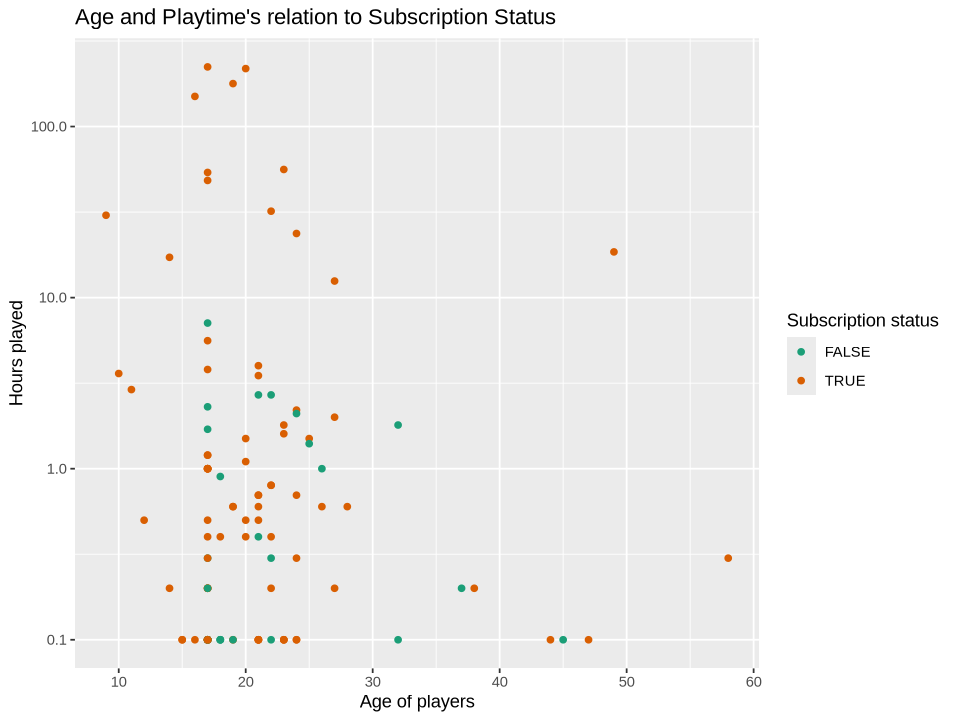

In [36]:
# Creating the visualization 
options(repr.plot.width = 8, repr.plot.height = 6)
players_plot <- players_clean |>
    ggplot(aes(x = Age, y = played_hours, color = subscribe)) +
    geom_point() +
    labs(x = "Age of players", y = "Hours played", color = "Subscription status", 
         title = "Age and Playtime's relation to Subscription Status") +
    theme(element_text(size = 14)) +
    scale_y_log10() +
    scale_color_brewer(palette = "Dark2") 
players_plot

Note that the y scale for playtime is scaled logarithmically, which essentially ignores the data with a playtime of 0 as log(0) isn't real. The analysis below disregards data where playtime is 0

There are a few observations that can be made from the visualization above: 

1. There is no visible relationship between player age and playtime.
2. Most players are within the age range between 20 - 30 years old.
3. Most players played between 0 - 10 hours.
4. There is no visible relationship with subscription status from age and playtime. 

## Step 5: Creating the Training and Testing Set 

In [37]:
# creating a 70 - 30 split of players_clean
players_split <- initial_split(players_clean, prop = 0.7, strata = subscribe) 
players_training <- training(players_split) # training data
players_testing <- testing(players_split) # testing data

## Step 6: Performing 5 Fold Cross-validation on `players_training`

In [38]:
set.seed(2019)
# creating the specifications for the model 
players_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

# creating the recipe 
players_recipe <- recipe(subscribe ~ played_hours + Age, data = players_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors()) 
players_recipe 

# creating the 5 folds for cross-validation
players_vfold <- vfold_cv(players_training, v = 5, strata = subscribe)

# setting up the workflow
players_workflow <- workflow() |>
  add_model(players_spec) |>
  add_recipe(players_recipe)
players_workflow

# creating the K values (from 1 to 10) 
k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1)) 

# fitting the data into a workflow and finding the best K
players_results <- players_workflow |>
  tune_grid(resamples = players_vfold, grid = k_vals) |>
  collect_metrics()
players_results

# finding the best K based on accuracy
best_players_k <- players_results |>
  filter(.metric == "accuracy") |>
  arrange(desc(mean)) |>
  slice(1) |>
  pull(neighbors)
best_players_k



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.6100000,5,0.05956261,Preprocessor1_Model01
1,roc_auc,binary,0.5674242,5,0.09058021,Preprocessor1_Model01
2,accuracy,binary,0.6100000,5,0.05956261,Preprocessor1_Model02
2,roc_auc,binary,0.5741162,5,0.08841052,Preprocessor1_Model02
3,accuracy,binary,0.7046429,5,0.04738574,Preprocessor1_Model03
3,roc_auc,binary,0.5854167,5,0.09406246,Preprocessor1_Model03
4,accuracy,binary,0.7046429,5,0.04738574,Preprocessor1_Model04
4,roc_auc,binary,0.5612374,5,0.09132987,Preprocessor1_Model04
5,accuracy,binary,0.7038095,5,0.03374407,Preprocessor1_Model05


[1] 7

## Step 7: Final workflow for training and testing the KNN classifier

In [39]:
# defining the final KNN model
final_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_players_k) |>
  set_engine("kknn") |>
  set_mode("classification")

# creating the final workflow 
final_workflow <- workflow() |>
  add_model(final_spec) |>
  add_recipe(players_recipe) |> 
  fit(data = players_training)

# generating predictions on testing data
players_predictions <- final_workflow |>
  predict(new_data = players_testing) |>
  bind_cols(players_testing)

# calculating performance metrics
players_summary <- players_predictions |>
  metrics(truth = subscribe, estimate = .pred_class)
players_summary
 

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7941176
kap,binary,0.1793103


## Step 8: visualizes how the mean accuracy of the KNN model changes with different numbers of neighbors (k)

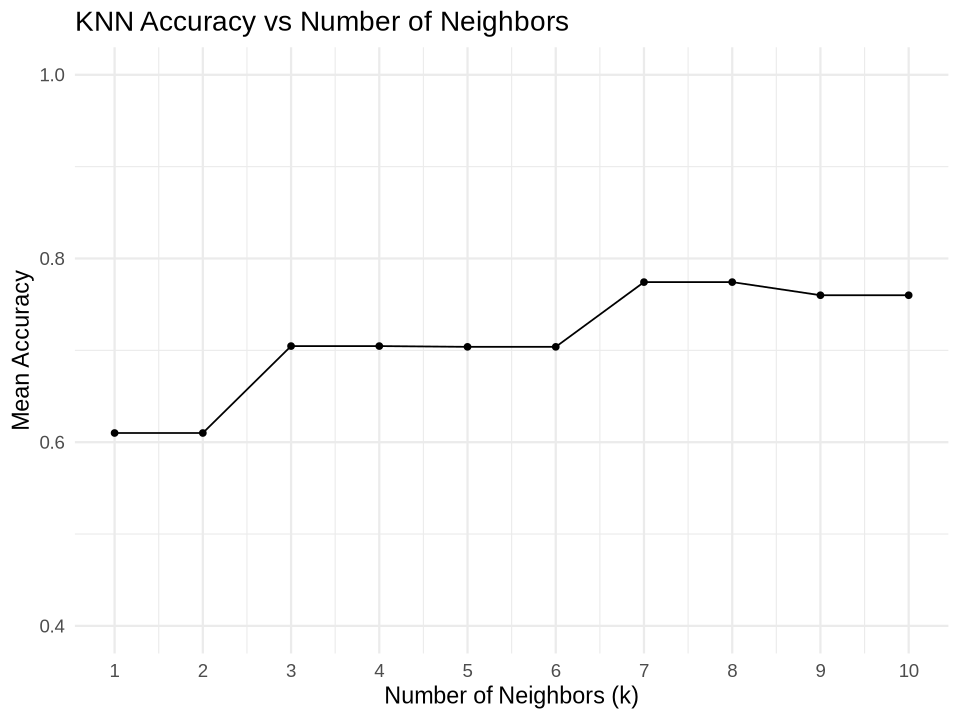

In [40]:
# filter out only the accuracy results from the KNN tuning
players_accuracy_results <- players_results |> 
  filter(.metric == "accuracy")

# create a plot 
accuracy_versus_k <- ggplot(players_accuracy_results, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Number of Neighbors (k)", y = "Mean Accuracy",
       title = "KNN Accuracy vs Number of Neighbors") +
  scale_x_continuous(breaks = seq(1, 10, by = 1)) +
  scale_y_continuous(limits = c(0.4, 1.0)) +
  theme_minimal(base_size = 14)

accuracy_versus_k


## References